In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Numpy
## Useful Methods

In [2]:
# Three equally spaced points between 0 and 5
np.linspace(0, 5, 3)

# Identity Matrix
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

## Random-Stuff

In [3]:
# Uniformly distributed
np.random.rand(5)

array([0.86744849, 0.92730942, 0.21349443, 0.40958192, 0.93069269])

In [4]:
# Standard Normal Distribution
np.random.randn(5)

array([-0.59819508,  0.40853773, -1.72685552, -1.01894846, -0.63240844])

In [5]:
# Random Integers
np.random.randint(1,7, 10)

array([1, 3, 5, 5, 1, 4, 6, 3, 2, 5])

## Reshaping

In [6]:
a = np.random.randint(0,50,10)
a

array([34, 32,  2, 39, 38, 49,  9, 41, 48,  6])

In [7]:
ra = a.reshape(5,2)
ra

array([[34, 32],
       [ 2, 39],
       [38, 49],
       [ 9, 41],
       [48,  6]])

In [8]:
ra.argmin()

2

## Indexing and Selection  

- Broadcasting

**NOTE** Slices return views of array, not copies! For copying use `arr.copy()`

----

In [9]:
arr = np.arange(0,11)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [10]:
slice_of_arr = arr[:5]
print(slice_of_arr)
slice_of_arr[:] = 99 # BROADCASTING
print(slice_of_arr)
print(arr)

[0 1 2 3 4]
[99 99 99 99 99]
[99 99 99 99 99  5  6  7  8  9 10]


# Pandas
## Hierarchical Indexing

In [11]:
arr = np.random.randn(6,2)
print(arr)
df = pd.DataFrame(arr)
print(df)

[[-1.99929013 -1.37479142]
 [ 0.9765076  -0.98840797]
 [-0.00295906  1.64040777]
 [-0.78913417 -0.60871679]
 [-0.89545141 -0.68056916]
 [ 0.40888385  0.72427275]]
          0         1
0 -1.999290 -1.374791
1  0.976508 -0.988408
2 -0.002959  1.640408
3 -0.789134 -0.608717
4 -0.895451 -0.680569
5  0.408884  0.724273


In [12]:
groups = ["G1"]*3 + ["G2"]*3
nums = [1, 2, 3, 1, 2, 3]

df.index=pd.MultiIndex.from_tuples(zip(groups, nums))
df.index.names = ["groups", "nums"]

In [13]:
df

0         1
groups nums                    
G1     1    -1.999290 -1.374791
       2     0.976508 -0.988408
       3    -0.002959  1.640408
G2     1    -0.789134 -0.608717
       2    -0.895451 -0.680569
       3     0.408884  0.724273

In [14]:
df.loc["G2"].loc[2]

0   -0.895451
1   -0.680569
Name: 2, dtype: float64

In [15]:
df.xs(2, level=1)

,0,1
groups,,
G1,0.976508,-0.988408
G2,-0.895451,-0.680569


In [16]:
df = pd.DataFrame({
    "group": "g1 g1 g2 g2 g1".split(),
    "a": "a b c d e".split(), 
    "b": "f g h i j".split(),
    })
df

,group,a,b
0,g1,a,f
1,g1,b,g
2,g2,c,h
3,g2,d,i
4,g1,e,j


In [17]:
df.apply(lambda row: list(row), axis=1)

0    [g1, a, f]
1    [g1, b, g]
2    [g2, c, h]
3    [g2, d, i]
4    [g1, e, j]
dtype: object

In [18]:
df.groupby("group").agg(lambda x: list(x))

,a,b
group,,
g1,"[a, b, e]","[f, g, j]"
g2,"[c, d]","[h, i]"


## Merging and Joining
- `df1.join(df2)` joins **only on index** but is faster than `pd.merge(df1, df2, on=COLNAME)`

# Matplotlib
## Functional Interface

Text(0.5, 1.0, 'FUNCTIONAL Plot')

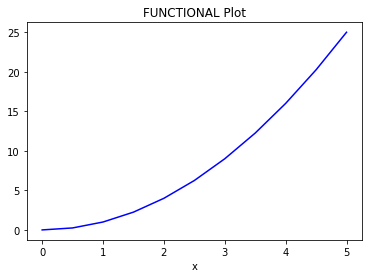

In [19]:
x = np.linspace(0,5,11)
y = x**2
# FUNCTIONAL
plt.plot(x,y, "b")
plt.xlabel("x")
plt.title("FUNCTIONAL Plot")

## Object Oriented Interface (Better)

Text(0.5, 1.0, 'OOP PLOT')

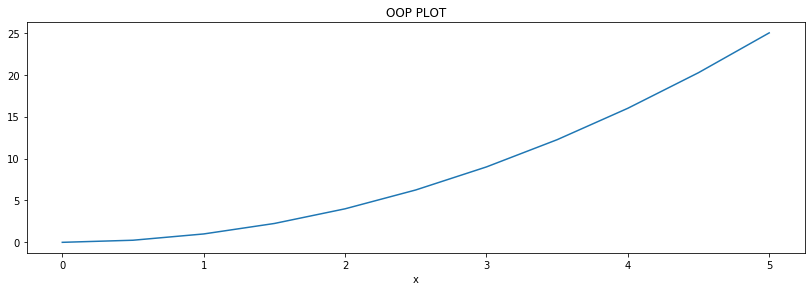

In [20]:
x = np.linspace(0,5,11)
y = x**2

# OOP
fig = plt.figure()

# left, bottom, width, heidht of axes
ax = fig.add_axes([0.1, 0.1, 1.8, 0.8])
ax.plot(x,y)
ax.set_xlabel("x")
ax.set_title("OOP PLOT")

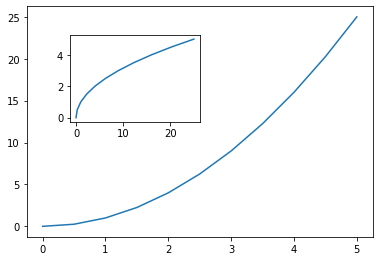

In [21]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1.plot(x,y)
ax2 = fig.add_axes([0.2, 0.5, 0.3, 0.3])
ax2.plot(y,x)

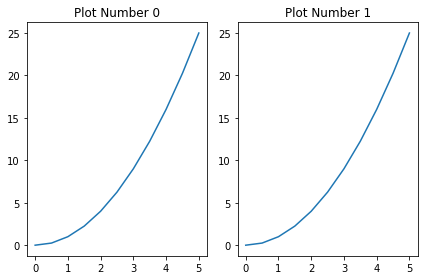

In [22]:
fig, axes = plt.subplots(1,2)

for a in axes:
    n = np.where(axes == a)[0][0]
    a.plot(x,y)
    a.set_title("Plot Number " + str(n))

plt.tight_layout() # To prevent overlap

## Other Parameters

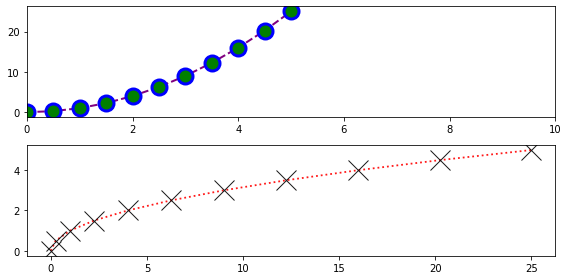

In [23]:
plt.style.use("fast")
fig, axes = plt.subplots(2, 1, figsize=(8,4))

axes[0].plot(x,y, color="purple", linewidth=2, linestyle="--", marker="o", markersize=15, markeredgecolor="blue", markerfacecolor="green", markeredgewidth=3)
axes[1].plot(y,x, color="red", alpha=0.9, lw=1.8, ls=":", marker="x", ms=20, mec="black") # lw <=> linewidth and ls <=> linestyle and mfc=markerfacecolor etc.
axes[0].set_xlim(0,10)
plt.tight_layout()

In [25]:
help(axes[0].plot)

Help on method plot in module matplotlib.axes._axes:

plot(*args, scalex=True, scaley=True, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the ap

----

#### See the "Advanced matplotlib Concepts" Notebook for more details!

# Seaborn

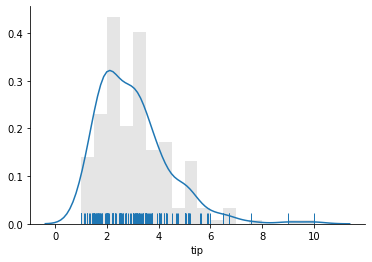

In [24]:
# RUGPLOTS!
df = sns.load_dataset("tips")
sns.rugplot(df.tip)
sns.distplot(df.tip, hist_kws=dict(alpha=0.2, color="0.5"))
sns.despine()

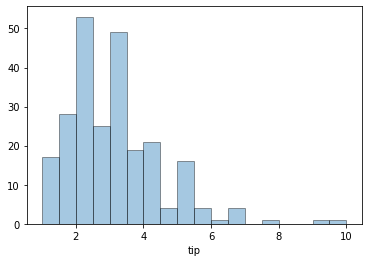

In [26]:
sns.distplot(df.tip, kde=False, hist_kws=dict(ec="k")) # Shows VALUE COUNTs on y instead of KDE

In [27]:
# Useful dict trick for (un)packing:
dict(linecolor="w", lw=0.2)

{'linecolor': 'w', 'lw': 0.2}

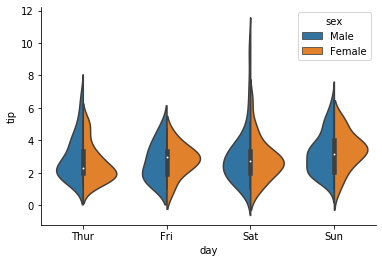

In [28]:
sns.violinplot(data=df, x="day", y="tip", hue="sex", split=True) #Split shows both hues instead of mirroring
sns.despine()

In [29]:
df = sns.load_dataset("flights")
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


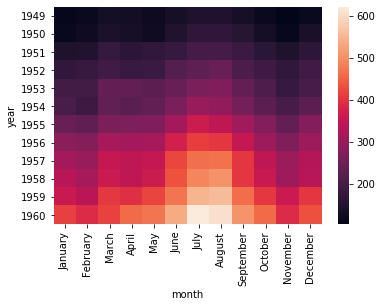

In [30]:
fp = pd.pivot_table(data=df, index="year", columns="month", values="passengers")
sns.heatmap(fp) # linecolor="w", lw=0.2

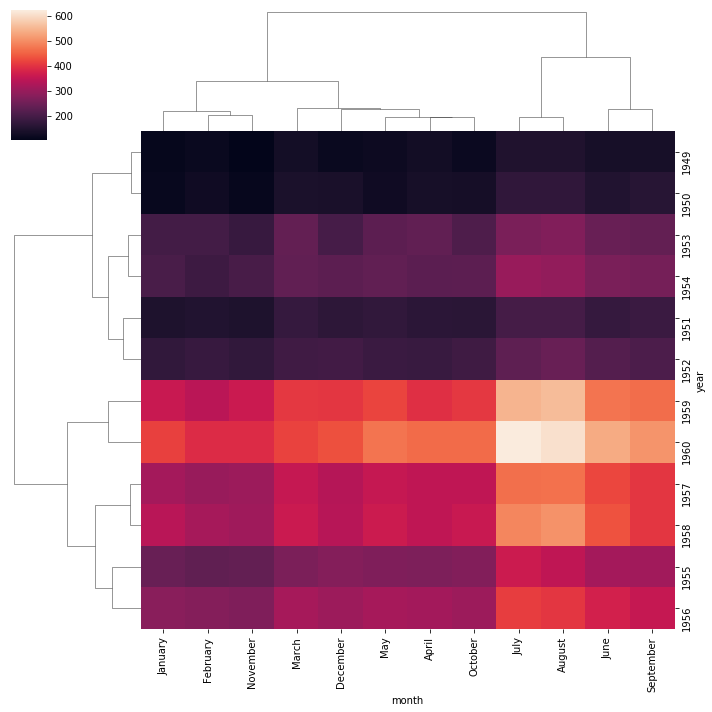

In [31]:
sns.clustermap(fp)

----

#### Clustermap shows similar months and years close to each other (Note the different order!) 

In [32]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


# Pandas Plotting

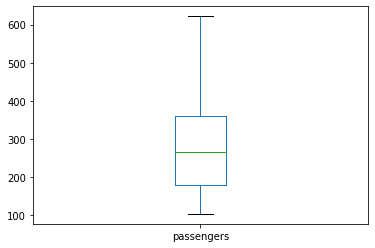

In [33]:
df.passengers.plot.box()

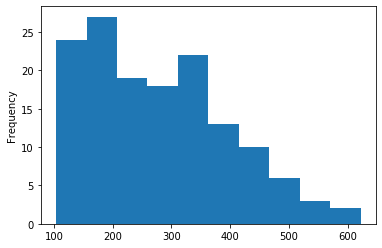

In [34]:
df.passengers.plot.hist()

## Pandas Multiindexing & GridSpecs for Plotting

In [148]:
df = pd.read_pickle("all_banks")
closes = df.xs("Close", level=1, axis=1)
std20 = closes.rolling(20).std()

closes = pd.concat([closes, std20], axis=1, keys=["close", "std20"]).swaplevel(axis=1).sort_index(axis=1)
# Hacky but works:
# closes = closes.stack(0).unstack()
closes

Bank Ticker    BAC                 C                GS              JPM  \
             close     std20   close     std20   close     std20  close   
Date                                                                      
2006-01-03   47.08       NaN  492.90       NaN  128.87       NaN  40.19   
2006-01-04   46.58       NaN  483.80       NaN  127.09       NaN  39.62   
2006-01-05   46.64       NaN  486.20       NaN  127.04       NaN  39.74   
2006-01-06   46.57       NaN  486.20       NaN  128.84       NaN  40.02   
2006-01-09   46.60       NaN  483.90       NaN  130.39       NaN  40.67   
...            ...       ...     ...       ...     ...       ...    ...   
2015-12-24   17.27  0.326391   52.71  1.223745  182.47  5.162821  66.60   
2015-12-28   17.13  0.325303   52.38  1.200603  181.62  4.919895  66.38   
2015-12-29   17.28  0.323313   52.98  1.170807  183.53  4.652792  67.07   
2015-12-30   17.05  0.300285   52.30  1.080074  182.01  3.986189  66.59   
2015-12-31   16.83  0.298445   51.75  1.052798  180.23  3.540285  66.03   

Bank Ticker               MS              WFC            
                std20  close     std20  close     std20  
Date                                                     
2006-01-03        NaN  58.31       NaN  31.90       NaN  
2006-01-04        NaN  58.35       NaN  31.53       NaN  
2006-01-05        NaN  58.51       NaN  31.50       NaN  
2006-01-06        NaN  58.57       NaN  31.68       NaN  
2006-01-09        NaN  59.19       NaN  31.68       NaN  
...               ...    ...       ...    ...       ...  
2015-12-24   1.085025  32.48  1.239223  54.82  0.786598  
2015-12-28   1.060109  32.17  1.260562  54.68  0.770094  
2015-12-29   1.074585  32.55  1.244439  55.29  0.776775  
2015-12-30   1.023749  32.23  1.155918  54.89  0.740509  
2015-12-31   1.014648  31.81  1.095879  54.36  0.735580  

[2517 rows x 12 columns]

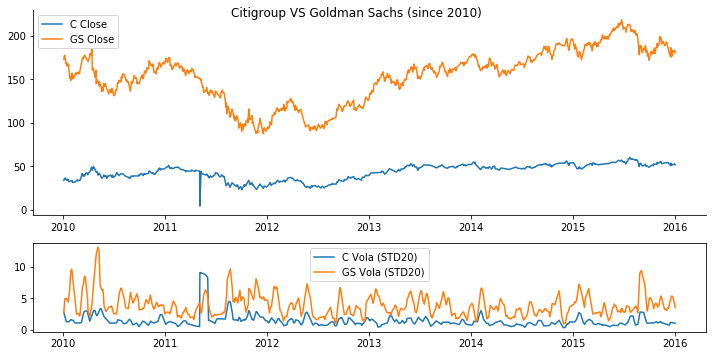

In [182]:
fig = plt.figure(figsize=(10,5))
gs = plt.GridSpec(3, 1)
ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[2, 0])

idx = pd.IndexSlice
# Using an IndexSlice (idx) instead of .loc[:, [slice("C"), slice("close")]]
ax1.plot(closes.loc["2010-01-01":, idx["C", "close"]], label="C Close")
ax1.plot(closes.loc["2010-01-01":, idx["GS", "close"]], label="GS Close")
ax1.legend()
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax2.plot(closes.loc["2010-01-01":, idx["C", "std20"]], label="C Vola (STD20)")
ax2.plot(closes.loc["2010-01-01":, idx["GS", "std20"]], label="GS Vola (STD20)")
ax2.legend()
fig.suptitle("Citigroup VS Goldman Sachs (since 2010)")
plt.tight_layout()

## Using a Heatmap for Missing Value Visualization

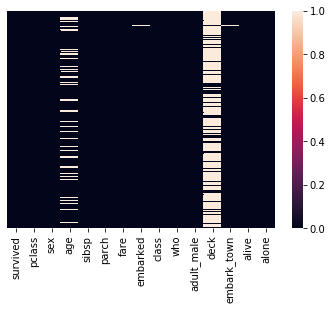

In [7]:
df = sns.load_dataset("titanic")
sns.heatmap(df.isna(), yticklabels=False)

# Machine Learning
## Metrics
### Recall
= Ability of a model to find all the relevant cases in a dataset  

$Recall = \frac{TP}{TP + FN}$

### Precision
= How precisely does the model classify **only the relevant data points**?

$Precision = \frac{TP}{TP + FP}$

### F1 Score
= Harmonic mean of precision and recall (use harmonic mean to punish **extreme** values like 0 or 1)

##